In [26]:
import pandas as pd

In [27]:
import numpy as np

In [28]:
import seaborn as sns

In [29]:
gastos = pd.read_csv("dados/University-Students-Monthly-Expenses.csv")

# Análise Geral

In [30]:
gastos.columns = ["genero", "idade", "ano_estudo", "reside", "bolsa", "trabalho", "transporte", "fuma", "bebe", "joga", "cosmeticos", "assinaturas", "gastos_mensais"]

In [31]:
gastos.head()

,genero,idade,ano_estudo,reside,bolsa,trabalho,transporte,fuma,bebe,joga,cosmeticos,assinaturas,gastos_mensais
0,Female,21,2.0,Home,No,No,No,No,No,No,Yes,No,150.0
1,Male,25,3.0,Hostel,No,Yes,Motorcycle,No,No,Yes,Yes,Yes,220.0
2,Male,23,2.0,Home,Yes,No,No,No,No,No,No,NaN,180.0
3,Male,19,3.0,Hostel,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
4,Female,19,2.0,Home,No,No,Motorcycle,No,No,No,Yes,No,300.0


In [32]:
print("media=", gastos.gastos_mensais.mean())
print("mediana=", gastos.gastos_mensais.median())
print("Desvio padrão=", gastos.gastos_mensais.std())

media= 214.94949494949495
mediana= 200.0
Desvio padrão= 60.69955682475706


In [33]:
gastos.describe()

,idade,ano_estudo,gastos_mensais
count,105.000000,101.000000,99.000000
mean,20.171429,2.653465,214.949495
std,1.898669,1.004347,60.699557
min,17.000000,1.000000,140.000000
25%,19.000000,2.000000,155.000000
50%,19.000000,2.000000,200.000000
75%,22.000000,4.000000,250.000000
max,25.000000,4.000000,350.000000


In [34]:
total_gastos_mensais = gastos.gastos_mensais.value_counts()

In [35]:
total_gastos_mensais_tabela = pd.DataFrame(total_gastos_mensais)
total_gastos_mensais_tabela.columns.name = 'gastos'
total_gastos_mensais_tabela.head()

gastos,gastos_mensais
200.0,22
150.0,20
300.0,15
250.0,12
180.0,11


# Gráficos distribuição dos gastos

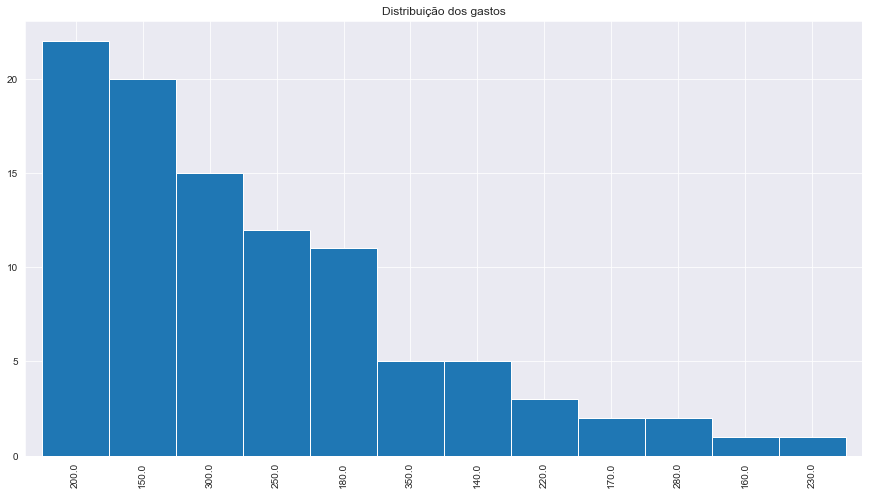

In [36]:
from seaborn.rcmod import palettes      #Distribuição gastos
sns.set_style('darkgrid')
fig = total_gastos_mensais.plot(kind="bar", title="Distribuição dos gastos", width = 1)
fig.figure.set_size_inches(15, 8)

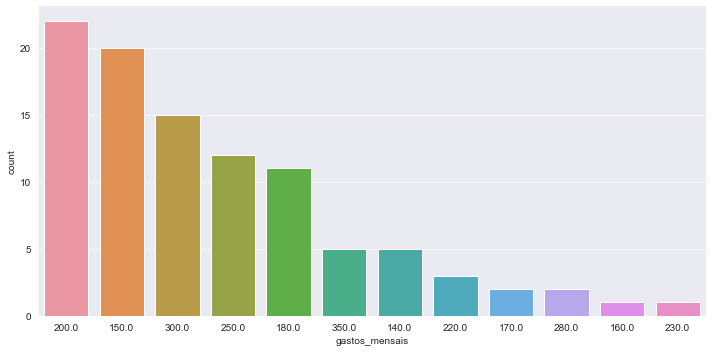

In [37]:
sns.catplot(x= "gastos_mensais", kind= "count", data= gastos, # Numero de pessoas e seus gastos
            order= total_gastos_mensais.index, aspect= 2)

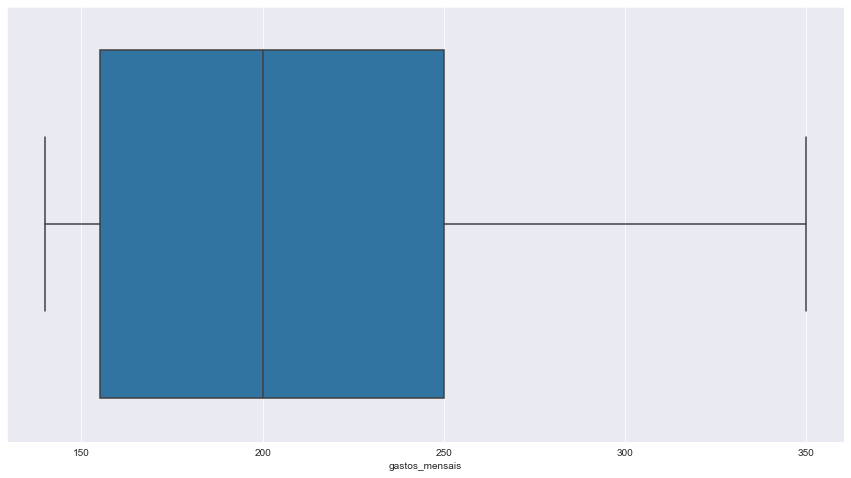

In [38]:
ax = sns.boxplot(x= 'gastos_mensais', data = gastos) 
ax.figure.set_size_inches(15,8)#Distribuição gastos mensais

# Gasto por sexo

In [39]:
gastos.genero.unique()

array(['Female ', 'Male '], dtype=object)

In [40]:
gastos.genero.value_counts()

Female     53
Male       52
Name: genero, dtype: int64

In [41]:
gasto_por_sexo_medio = gastos.groupby("genero").mean().gastos_mensais #Média gasto por sexo
gasto_por_sexo_medio

genero
Female     213.137255
Male       216.875000
Name: gastos_mensais, dtype: float64

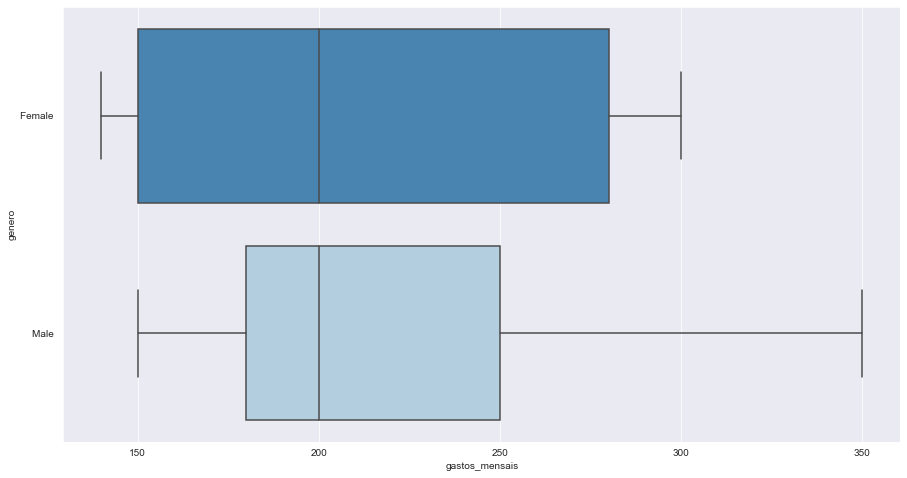

In [42]:
ax = sns.boxplot(data= gastos, x="gastos_mensais", 
            y="genero", palette="Blues_r")
ax.figure.set_size_inches(15,8)#Distribuição gastos por sexo

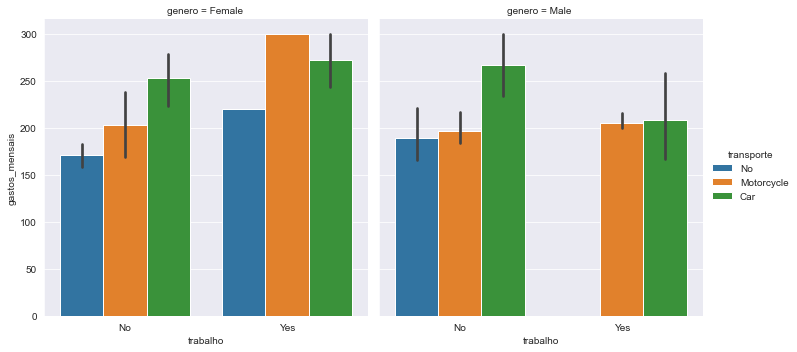

In [43]:
ax = sns.catplot(data = gastos, kind= "bar", x="trabalho", y="gastos_mensais", 
            hue="transporte", col= "genero")

#Gastos por genero e meio de transporte e trabalho

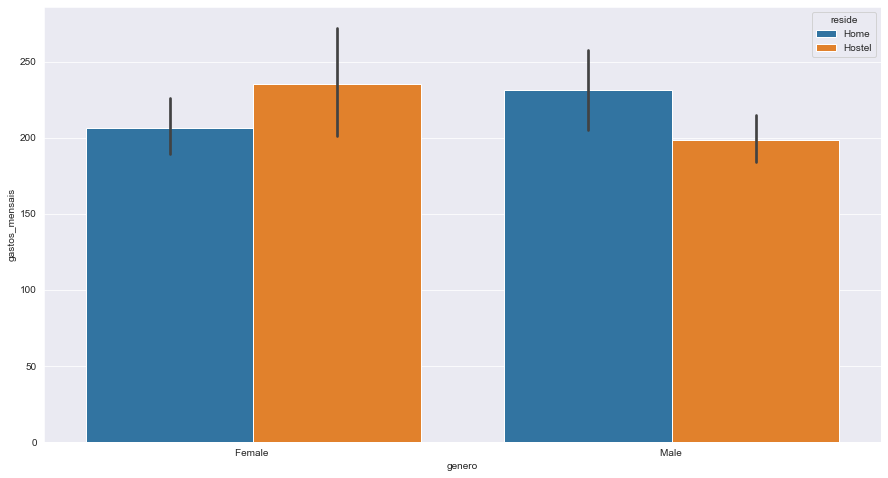

In [44]:
ax = sns.barplot(data = gastos, x="genero", y="gastos_mensais", hue="reside")
ax.figure.set_size_inches(15,8)#gastos por genero e residência

# Gasto por idade

In [45]:
gastos_idade = gastos.idade.value_counts()
gastos_idade

19    33
22    32
18    19
21     8
23     8
17     4
25     1
Name: idade, dtype: int64

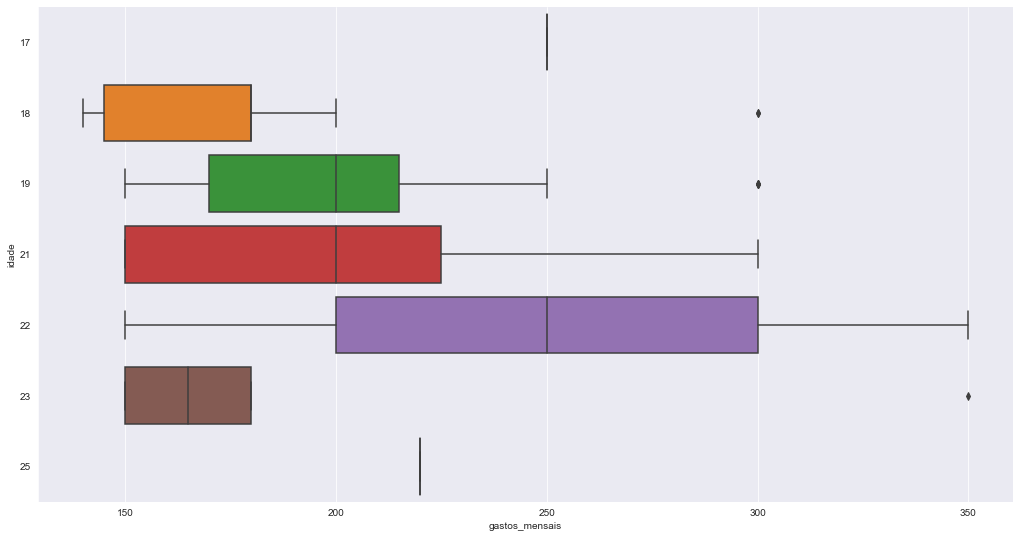

In [46]:
ax = sns.catplot(x= "gastos_mensais", y= "idade", kind= "box", #Gasto por idade
            data= gastos, aspect= 1.5, orient = 'h')
ax.figure.set_size_inches(15, 8)

In [47]:
sns.__version__

'0.11.2'